In [ ]:
import pandas as pd
import numpy as np

df=pd.read_csv("/content/swiggy.csv")
df.head()

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63


In [ ]:
# Display basic information and first few rows
df_info = df.info()
df_head = df.head()

# Check for missing values
missing_values = df.isnull().sum()

df_info, df_head, missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             8680 non-null   int64  
 1   Area           8680 non-null   object 
 2   City           8680 non-null   object 
 3   Restaurant     8680 non-null   object 
 4   Price          8680 non-null   float64
 5   Avg ratings    8680 non-null   float64
 6   Total ratings  8680 non-null   int64  
 7   Food type      8680 non-null   object 
 8   Address        8680 non-null   object 
 9   Delivery time  8680 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 678.3+ KB


(None,
     ID         Area       City         Restaurant  Price  Avg ratings  \
 0  211  Koramangala  Bangalore        Tandoor Hut  300.0          4.4   
 1  221  Koramangala  Bangalore      Tunday Kababi  300.0          4.1   
 2  246    Jogupalya  Bangalore            Kim Lee  650.0          4.4   
 3  248  Indiranagar  Bangalore  New Punjabi Hotel  250.0          3.9   
 4  249  Indiranagar  Bangalore                Nh8  350.0          4.0   
 
    Total ratings                                          Food type  \
 0            100          Biryani,Chinese,North Indian,South Indian   
 1            100                                   Mughlai,Lucknowi   
 2            100                                            Chinese   
 3            500               North Indian,Punjabi,Tandoor,Chinese   
 4             50  Rajasthani,Gujarati,North Indian,Snacks,Desser...   
 
         Address  Delivery time  
 0     5Th Block             59  
 1     5Th Block             56  
 2   Double

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# ✅ Load dataset
df = pd.read_csv("/content/swiggy.csv")  # Update with actual dataset path

# ✅ Drop unnecessary columns
df_cleaned = df.drop(columns=['ID', 'Restaurant', 'Address'])

# ✅ Rename columns for consistency
df_cleaned.rename(columns={'Avg ratings': 'Avg_ratings',
                            'Total ratings': 'Total_ratings',
                            'Food type': 'Food_type',
                            'Delivery time': 'Delivery_time'}, inplace=True)

In [ ]:
# ✅ Encode categorical features (Store LabelEncoders for Flask)
label_encoders = {}
for col in ['Area', 'City', 'Food_type']:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

df_cleaned['Popularity_Score'] = (df_cleaned['Avg_ratings'] * np.log1p(df_cleaned['Total_ratings'])) / np.log1p(df_cleaned['Total_ratings'].max()) * 10


# ✅ Normalize Popularity Score (Ensures it is between 0-10)
scaler = MinMaxScaler(feature_range=(0, 10))
df_cleaned[['Popularity_Score']] = scaler.fit_transform(df_cleaned[['Popularity_Score']])

In [ ]:
# ✅ Define Features (X) and Target (y)
FEATURE_ORDER = ['Area', 'City', 'Price', 'Avg_ratings', 'Total_ratings', 'Food_type', 'Delivery_time']
X = df_cleaned[FEATURE_ORDER]  # Ensure feature order is maintained
y = df_cleaned['Popularity_Score']

# ✅ Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# ✅ Train Random Forest Model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# ✅ Make Predictions on Test Set
y_pred_rf = model_rf.predict(X_test)

# ✅ Evaluate Model Performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"🔹 Mean Squared Error: {mse_rf:.4f}")
print(f"🔹 R² Score: {r2_rf:.4f}")

🔹 Mean Squared Error: 0.0002
🔹 R² Score: 0.9999


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# ✅ Train Linear Regression Model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# ✅ Make Predictions on Test Set
y_pred_lr = model_lr.predict(X_test)

# ✅ Evaluate Model Performance
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"🔹 Linear Regression - Mean Squared Error: {mse_lr:.4f}")
print(f"🔹 Linear Regression - R² Score: {r2_lr:.4f}")


🔹 Linear Regression - Mean Squared Error: 1.0072
🔹 Linear Regression - R² Score: 0.6021


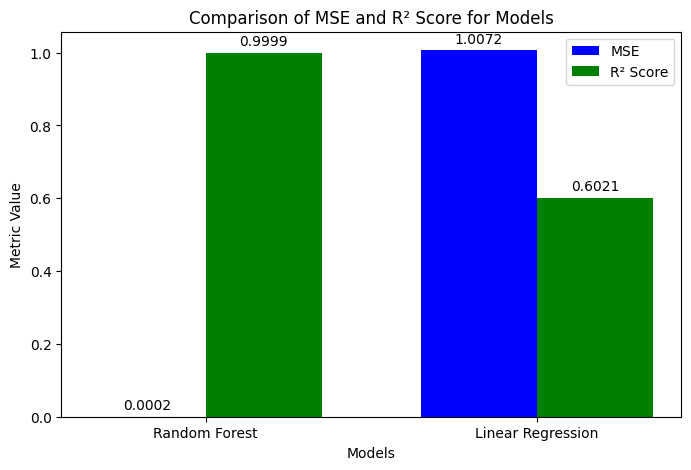

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Random Forest', 'Linear Regression']

# Metrics
mse_values = [mse_rf, mse_lr]
r2_values = [r2_rf, r2_lr]

# Bar width and positions
bar_width = 0.35
x = np.arange(len(models))

# Create a grouped bar plot
fig, ax = plt.subplots(figsize=(8, 5))

# Plot bars for MSE and R²
bars1 = ax.bar(x - bar_width/2, mse_values, bar_width, label='MSE', color='blue')
bars2 = ax.bar(x + bar_width/2, r2_values, bar_width, label='R² Score', color='green')

# Labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Metric Value')
ax.set_title('Comparison of MSE and R² Score for Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Annotate values on top of bars
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.4f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),
                textcoords='offset points',
                ha='center', fontsize=10, color='black')

# Show plot
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error

# Mean Absolute Error (MAE)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

# Mean Absolute Percentage Error (MAPE)
mape_rf = np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100
mape_lr = np.mean(np.abs((y_test - y_pred_lr) / y_test)) * 100

# Accuracy (100 - MAPE)
accuracy_rf = 100 - mape_rf
accuracy_lr = 100 - mape_lr

# Print results
print(f"🔹 Random Forest - Accuracy: {accuracy_rf:.2f}%")
print(f"🔹 Linear Regression - Accuracy: {accuracy_lr:.2f}%")


🔹 Random Forest - Accuracy: 99.95%
🔹 Linear Regression - Accuracy: 77.60%


In [ ]:
# ✅ Save Trained Model, Scaler & Label Encoders for Flask Integration
joblib.dump(model_rf, "new_popularity_model.pkl")
joblib.dump(scaler, "minmax_scaler.pkl")
joblib.dump(label_encoders['Area'], "label_encoder_area.pkl")
joblib.dump(label_encoders['City'], "label_encoder_city.pkl")
joblib.dump(label_encoders['Food_type'], "label_encoder_food.pkl")

print("✅ Model & encoders saved successfully!")

✅ Model & encoders saved successfully!


In [ ]:
from google.colab import files

# Download model and encoders
files.download("new_popularity_model.pkl")
files.download("minmax_scaler.pkl")
files.download("label_encoder_area.pkl")
files.download("label_encoder_city.pkl")
files.download("label_encoder_food.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print("Min values:", scaler.data_min_)
print("Max values:", scaler.data_max_)


Min values: [6.6110247]
Max values: [41.61393782]


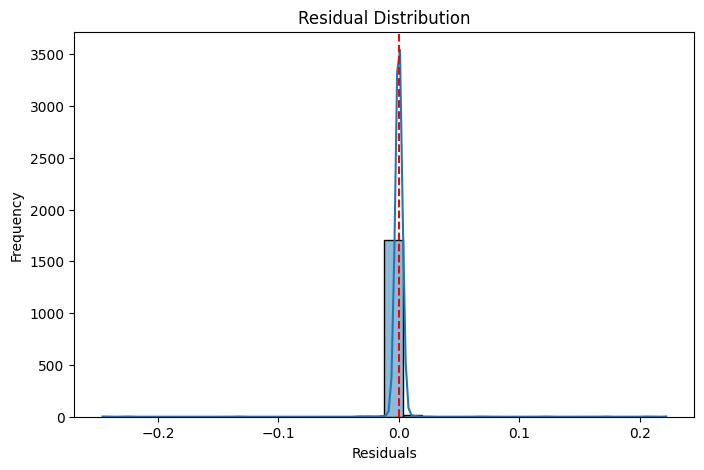

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred_rf

# Plot residuals
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(x=0, color='red', linestyle='--')
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


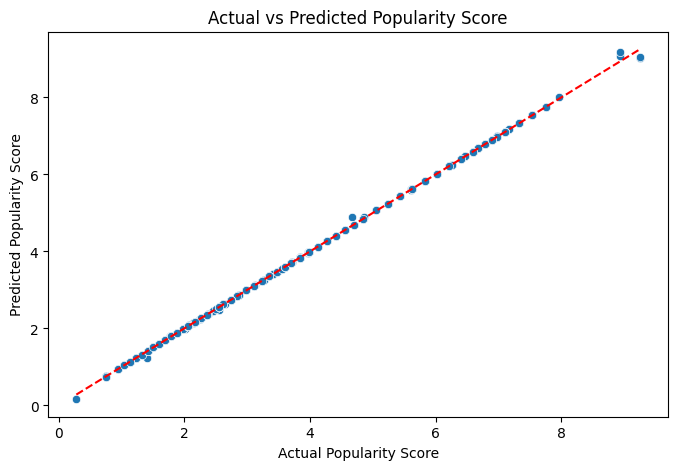

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.xlabel("Actual Popularity Score")
plt.ylabel("Predicted Popularity Score")
plt.title("Actual vs Predicted Popularity Score")
plt.show()
